In [1]:
#!pip install pycaret==3.0
#!pip install requests

In [2]:
import pycaret
pycaret.__version__

'3.3.0'

In [3]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 2

In [5]:
from pycaret.regression import*
s2 = setup(data, target = 'charges',
           normalize = True,
           polynomial_features = True,
           #silent=True,
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,Session id,3734
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [6]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2828.8537,25223027.6554,5022.2532,0.7648,0.4389,0.2937
1,3071.9247,21689744.1505,4657.2249,0.8582,0.4300,0.3155
2,2421.0693,14067075.8724,3750.6101,0.8654,0.4003,0.2959
3,2826.9733,21403687.5845,4626.4120,0.8546,0.4503,0.3333
4,3845.2991,47908254.5399,6921.5789,0.7411,0.5024,0.3045
5,2723.8382,21403182.2081,4626.3573,0.8716,0.4001,0.2613
6,2916.9573,25784407.3074,5077.8349,0.7591,0.4912,0.3205
7,3415.8881,29584722.6527,5439.1840,0.8600,0.5231,0.3166
8,2760.8238,18614475.6944,4314.4496,0.8826,0.3175,0.2355


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

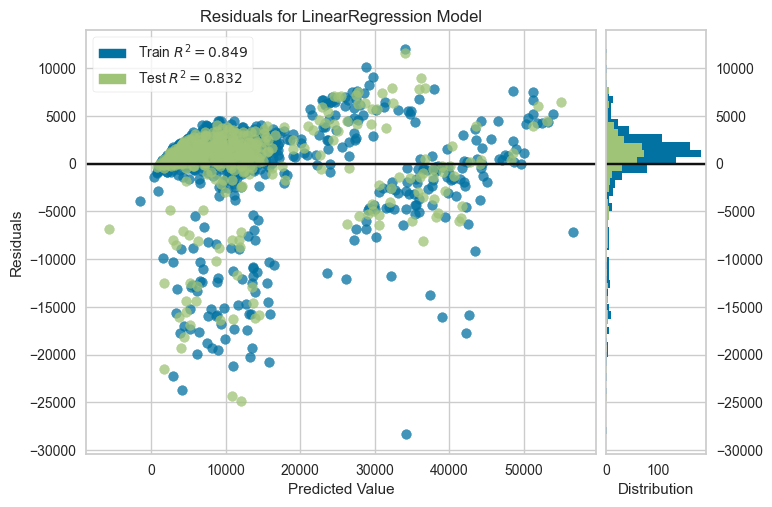

In [7]:
plot_model(lr)

In [8]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                 

In [9]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [10]:
deployment_28042020

Pipeline(memory=FastMemory(location=C:\Users\CAPLOG~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 Transform...
                                                              use_cat_names=True))),
                ('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['age', 'bmi'],
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', LinearRegression(n_jobs=-1))])

### Execute the Application

In [30]:
!streamlit run app.py

^C


#### import requests

In [ ]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())